In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(141,181)]
i =0
result = np.zeros((480,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.IAGE.nc')
        plotvar = data.variables['IAGE'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[250:344,1100:1300]
        latt = latt[250:344,1100:1300]
        plotvar = plotvar[:,250:344,1100:1300]
        #plotvar = plotvar[50,250:344,600:1400]
        #plotvar.mask = ma.nomask
        #plotvar[plotvar >300] = np.nan
        #plotvar.mask = ma.nomask
        aveplot = plotvar.mean(axis=1)
        #aveplot.mask = ma.nomask
        #aveplot[aveplot >300 ] = np.nan
        #aveplot.mask = ma.nomask
        aveplot = aveplot.mean(axis=1)
        #aveplot.mask = ma.nomask
        #aveplot[aveplot >300 ] = np.nan
        
        result[i,:] = aveplot[:]
        
        i = i + 1
#********************************************************************


In [4]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0152-07.z_t.nc')
C = data1.variables['z_t'][:]/100

In [5]:
A = np.arange(480)
#B = np.arange(50)
xx, yy = np.meshgrid(C, A)

In [6]:
xx[50]

array([5.0000000e+00, 1.5000000e+01, 2.5000000e+01, 3.5000000e+01,
       4.5000000e+01, 5.5000000e+01, 6.5000000e+01, 7.5000000e+01,
       8.5000000e+01, 9.5000000e+01, 1.0500000e+02, 1.1500000e+02,
       1.2500000e+02, 1.3500000e+02, 1.4500000e+02, 1.5500000e+02,
       1.6509840e+02, 1.7547905e+02, 1.8629128e+02, 1.9766028e+02,
       2.0971138e+02, 2.2257828e+02, 2.3640883e+02, 2.5137016e+02,
       2.6765421e+02, 2.8548364e+02, 3.0511923e+02, 3.2686798e+02,
       3.5109348e+02, 3.7822763e+02, 4.0878464e+02, 4.4337769e+02,
       4.8273672e+02, 5.2772803e+02, 5.7937286e+02, 6.3886261e+02,
       7.0756329e+02, 7.8700250e+02, 8.7882526e+02, 9.8470587e+02,
       1.1062042e+03, 1.2445669e+03, 1.4004972e+03, 1.5739464e+03,
       1.7640033e+03, 1.9689442e+03, 2.1864565e+03, 2.4139717e+03,
       2.6490012e+03, 2.8893848e+03, 3.1334048e+03, 3.3797935e+03,
       3.6276704e+03, 3.8764519e+03, 4.1257681e+03, 4.3753926e+03,
       4.6251904e+03, 4.8750835e+03, 5.1250283e+03, 5.3750000e

In [7]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,70,90,110,130,140,150,170,190,210,230,240]) 

new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'20'}
#nice_levels = [34.20,34.30,34.35,34.40,34.45,34.50,34.65,34.70,34.72,34.73]
nice_levels = [0.5,10,30,50,70,90,110]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'interpolation'
  after removing the cwd from sys.path.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


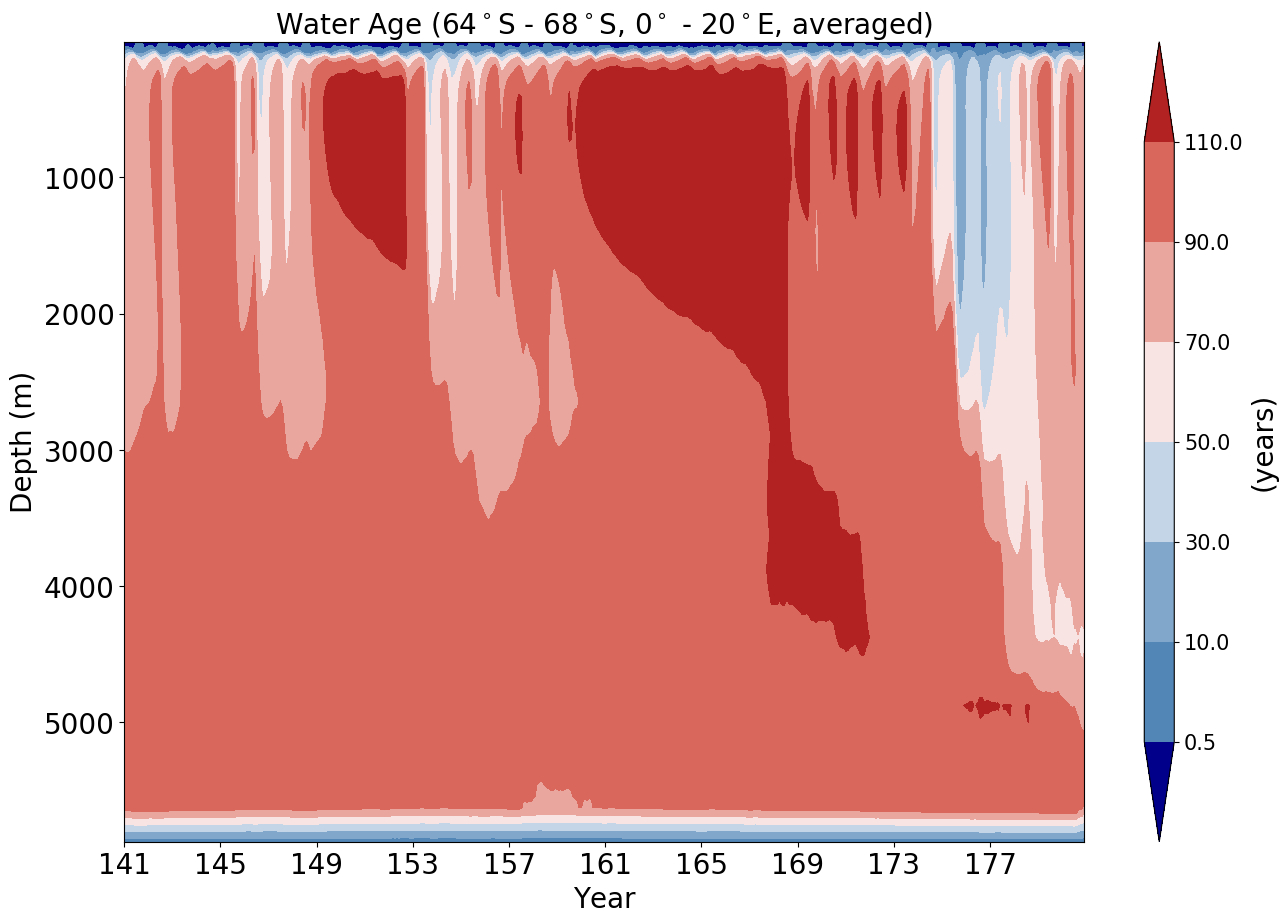

In [8]:
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(yy[:,:], xx[:,:], result[:,:],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#CS = ax0.contour(yy,xx,result, [0.8],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('(years)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
plt.xticks(range(0,480,48), ['141', '145', '149', '153', '157','161','165','169','173','177'],**my_font)
plt.yticks(**my_font)
#plt.yticks(range(0,40,5), ['1', '2', '3', '4', '5','6','7','8','9'])
plt.xlabel('Year',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Water Age (64$^\circ$S - 68$^\circ$S, 0$^\circ$ - 20$^\circ$E, averaged)',**my_font)

plt.savefig("iage.png")

In [9]:
yy.shape

(480, 62)